In [84]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 로지스틱 회귀
from statsmodels.api import Logit
# 분류모델 평가 함수
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

# 그래프 한글폰트 적용:맑은 고딕
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

# 팔레트 설정
palette = sns.color_palette('Paired')
colors = sns.color_palette('Pastel1')
sns.set_palette('Paired')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df_raw = pd.read_csv("/content/drive/MyDrive/PABA/data_file/final_scale.csv")
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,day_yn,purpose
0,0,미국,T,32,3700,15100,1,1,1144,116,1133,59,259,TMCP(온도제어),934,8,주간,선체구조용(조선용)
1,0,미국,T,32,3700,15100,1,2,1144,122,1135,53,238,TMCP(온도제어),937,8,주간,선체구조용(조선용)
2,0,영국,T,33,3600,19200,2,1,1129,116,1121,55,258,TMCP(온도제어),889,8,주간,선체구조용(조선용)
3,0,영국,T,33,3600,19200,2,2,1152,125,1127,68,266,TMCP(온도제어),885,8,주간,선체구조용(조선용)
4,0,프랑스,T,38,3100,13300,3,1,1140,134,1128,48,246,TMCP(온도제어),873,8,주간,선체구조용(조선용)


In [47]:
df_raw[['fur_no','fur_input_row']] = df_raw[['fur_no','fur_input_row']].astype(str)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            947 non-null    int64 
 1   spec_country     947 non-null    object
 2   steel_kind       947 non-null    object
 3   pt_thick         947 non-null    int64 
 4   pt_width         947 non-null    int64 
 5   pt_length        947 non-null    int64 
 6   fur_no           947 non-null    object
 7   fur_input_row    947 non-null    object
 8   fur_heat_temp    947 non-null    int64 
 9   fur_heat_time    947 non-null    int64 
 10  fur_soak_temp    947 non-null    int64 
 11  fur_soak_time    947 non-null    int64 
 12  fur_total_time   947 non-null    int64 
 13  rolling_method   947 non-null    object
 14  rolling_temp     947 non-null    int64 
 15  descaling_count  947 non-null    int64 
 16  day_yn           947 non-null    object
 17  purpose          947 non-null    ob

In [48]:
df_raw_x = df_raw.drop('scale', axis=1)
df_raw_x_1 = df_raw.drop(["scale", 'steel_kind', 'day_yn', 'rolling_method'], axis=1)
df_raw_x_2 = df_raw[['steel_kind', 'day_yn', 'rolling_method']]  # 범주가 2개인 자료는 따로 dummy화
df_raw_y = df_raw['scale']

In [49]:
df_raw_x_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   spec_country     947 non-null    object
 1   pt_thick         947 non-null    int64 
 2   pt_width         947 non-null    int64 
 3   pt_length        947 non-null    int64 
 4   fur_no           947 non-null    object
 5   fur_input_row    947 non-null    object
 6   fur_heat_temp    947 non-null    int64 
 7   fur_heat_time    947 non-null    int64 
 8   fur_soak_temp    947 non-null    int64 
 9   fur_soak_time    947 non-null    int64 
 10  fur_total_time   947 non-null    int64 
 11  rolling_temp     947 non-null    int64 
 12  descaling_count  947 non-null    int64 
 13  purpose          947 non-null    object
dtypes: int64(10), object(4)
memory usage: 103.7+ KB


In [50]:
# 범주형 변수 선택 : select_dtypes="object"
df_raw_x_char_1 = df_raw_x_1.select_dtypes(include = "object")
df_raw_x_char_2 = df_raw_x_2.select_dtypes(include = "object")
df_raw_x_char = pd.concat([df_raw_x_char_1, df_raw_x_char_2], axis=1)

# get_dummies: 범주형 변수에 대한 더미변환
df_x_dummy_1 = pd.get_dummies(df_raw_x_char_1)
df_x_dummy_2 = pd.get_dummies(df_raw_x_char_2, drop_first=True) # 범주가 2개인 자료는 따로 dummy화
df_x_dummy = pd.concat([df_x_dummy_1, df_x_dummy_2], axis=1)


# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

# 원래 연속형(df_raw_x_num) + 원래 범주형(df_raw_x_char)
df_x_raw_raw = df_raw_x_num.join(df_raw_x_char)
display("원래 연속형+ 원래 범주형...로지스틱용:",df_x_raw_raw.head(3))

# 원래 연속형(df_raw_x_num) + dummy된 범주형(df_x_dummy)
df_x_raw_dummy = df_raw_x_num.join(df_x_dummy)
display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:",df_x_raw_dummy.head(3))

# scale된 연속형(df_x_scaled)+ dummy된 범주형(df_x_dummy)
df_x_scale_dummy = df_x_scaled.join(df_x_dummy)
display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:",df_x_scale_dummy.head(3))

# scale된 연속형(df_x_scaled) + 원래 범주형(df_raw_x_char)
df_x_scale_raw = df_x_scaled.join(df_raw_x_char)
display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_x_scale_raw.head(3))



'원래 연속형+ 원래 범주형...로지스틱용:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,spec_country,fur_no,fur_input_row,purpose,steel_kind,day_yn,rolling_method
0,32,3700,15100,1144,116,1133,59,259,934,8,미국,1,1,선체구조용(조선용),T,주간,TMCP(온도제어)
1,32,3700,15100,1144,122,1135,53,238,937,8,미국,1,2,선체구조용(조선용),T,주간,TMCP(온도제어)
2,33,3600,19200,1129,116,1121,55,258,889,8,영국,2,1,선체구조용(조선용),T,주간,TMCP(온도제어)


'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_3,fur_input_row_1,fur_input_row_2,purpose_OTHERS,purpose_선체구조용(조선용),purpose_용접구조용,purpose_일반구조용,steel_kind_T,day_yn_주간,rolling_method_TMCP(온도제어)
0,32,3700,15100,1144,116,1133,59,259,934,8,...,0,1,0,0,1,0,0,1,1,1
1,32,3700,15100,1144,122,1135,53,238,937,8,...,0,0,1,0,1,0,0,1,1,1
2,33,3600,19200,1129,116,1121,55,258,889,8,...,0,1,0,0,1,0,0,1,1,1


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_3,fur_input_row_1,fur_input_row_2,purpose_OTHERS,purpose_선체구조용(조선용),purpose_용접구조용,purpose_일반구조용,steel_kind_T,day_yn_주간,rolling_method_TMCP(온도제어)
0,0.298839,1.765880,-1.561273,-0.623951,1.13104,-1.034421,-0.615879,0.534990,-0.103218,-0.342411,...,0,1,0,0,1,0,0,1,1,1
1,0.298839,1.765880,-1.561273,-0.623951,1.35857,-0.918753,-0.906940,-0.017416,-0.056516,-0.342411,...,0,0,1,0,1,0,0,1,1,1
2,0.354957,1.562785,-1.265674,-1.333010,1.13104,-1.728433,-0.809920,0.508684,-0.803747,-0.342411,...,0,1,0,0,1,0,0,1,1,1


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,spec_country,fur_no,fur_input_row,purpose,steel_kind,day_yn,rolling_method
0,0.298839,1.765880,-1.561273,-0.623951,1.13104,-1.034421,-0.615879,0.534990,-0.103218,-0.342411,미국,1,1,선체구조용(조선용),T,주간,TMCP(온도제어)
1,0.298839,1.765880,-1.561273,-0.623951,1.35857,-0.918753,-0.906940,-0.017416,-0.056516,-0.342411,미국,1,2,선체구조용(조선용),T,주간,TMCP(온도제어)
2,0.354957,1.562785,-1.265674,-1.333010,1.13104,-1.728433,-0.809920,0.508684,-0.803747,-0.342411,영국,2,1,선체구조용(조선용),T,주간,TMCP(온도제어)


In [51]:
## train_test_split
# 원래 연속형+ Dummied 범주형...DT/RF/GB 용:df_x_raw_dummy
# 1. 데이터의 자연스러운 분포 유지(스케일링의 경우, 자연스러운 분포로 변형되어 분할지점을 찾는데 방해 될 수 있음)
# 2. 범주형 변수의 처리(결정 트리가 각 범주를 명확하게 구분할 수 있게 해줌)
# 3. 스케일링의 불필요성(모델이 변수의 절대값보다는 변수의 분할 지점을 통해 데이터를 구분하기 때문)

df_train_x_lo, df_test_x_lo, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y
                                    , test_size = 0.3,random_state = 2024, stratify = df_x_raw_dummy["steel_kind_T"])

# # 원래 연속형+ Dummied 범주형...DT/RF/GB 용:df_x_raw_dummy
# df_train_x_rd, df_test_x_rd, df_train_y, df_test_y = train_test_split(df_x_raw_dummy, df_raw_y
#                                     , test_size = 0.3,random_state = 2024, stratify = df_x_raw_dummy["steel_kind_T"])

# display("원래 연속형+ Dummied 범주형...DT/RF/GB 용:", df_train_x_rd.head())

# # 기계학습용 데이터(Scaled 연속형+ Dummied 범주형) 분할:df_x_scale_dummy
# df_train_x_sd, df_test_x_sd, df_train_y, df_test_y = train_test_split(df_x_scale_dummy, df_raw_y
#                                     , test_size = 0.3,random_state = 2024, stratify = df_x_raw_dummy["steel_kind_T"])

# display("Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:", df_train_x_sd.head())

# # 회귀분석용(표준화 회귀계수) 데이터(Scaled 연속형+ 원래 범주형) 분할:df_x_scale_raw
# df_train_x_reg, df_test_x_reg, df_train_y, df_test_y = train_test_split(df_x_scale_raw, df_raw_y
#                                     , test_size = 0.3,random_state = 2024, stratify = df_x_raw_dummy["steel_kind_T"])

# display("Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):",df_train_x_reg.head())

'원래 연속형+ Dummied 범주형...DT/RF/GB 용:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_3,fur_input_row_1,fur_input_row_2,purpose_OTHERS,purpose_선체구조용(조선용),purpose_용접구조용,purpose_일반구조용,steel_kind_T,day_yn_주간,rolling_method_TMCP(온도제어)
565,81,2900,9800,1139,132,1124,80,287,877,6,...,0,0,1,1,0,0,0,1,1,0
771,26,2600,31300,1165,73,1160,63,223,1026,8,...,0,1,0,1,0,0,0,0,0,0
46,51,3100,12400,1133,57,1125,103,238,862,6,...,1,1,0,0,1,0,0,1,1,1
703,19,2700,54300,1178,69,1165,57,227,1005,10,...,1,1,0,0,1,0,0,0,1,0
457,14,2900,54300,1166,72,1163,60,221,923,10,...,1,1,0,0,0,1,0,0,1,0


'Scaled 연속형+ Dummied 범주형...SVM/NN/KNN 용:'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,fur_no_3,fur_input_row_1,fur_input_row_2,purpose_OTHERS,purpose_선체구조용(조선용),purpose_용접구조용,purpose_일반구조용,steel_kind_T,day_yn_주간,rolling_method_TMCP(온도제어)
565,3.048596,0.141116,-1.943388,-0.860304,1.737786,-1.554930,0.402834,1.271531,-0.990555,-1.594390,...,0,0,1,1,0,0,0,1,1,0
771,-0.037866,-0.468171,-0.393299,0.368730,-0.499588,0.527104,-0.421839,-0.411992,1.328976,-0.342411,...,0,1,0,1,0,0,0,0,0,0
46,1.365071,0.547307,-1.755935,-1.143928,-1.106333,-1.497096,1.518568,-0.017416,-1.224065,-1.594390,...,1,1,0,0,1,0,0,1,1,1
703,-0.430688,-0.265075,1.264936,0.983248,-0.651274,0.816276,-0.712900,-0.306772,1.002062,0.909569,...,1,1,0,0,1,0,0,0,1,0
457,-0.711276,0.141116,1.264936,0.416001,-0.537509,0.700607,-0.567369,-0.464602,-0.274458,0.909569,...,1,1,0,0,0,1,0,0,1,0


'Scaled 연속형+ 원래 범주형...회귀분석용(표준화 회귀계수):'

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,spec_country,fur_no,fur_input_row,purpose,steel_kind,day_yn,rolling_method
565,3.048596,0.141116,-1.943388,-0.860304,1.737786,-1.554930,0.402834,1.271531,-0.990555,-1.594390,한국,2,2,OTHERS,T,주간,CR(제어압연)
771,-0.037866,-0.468171,-0.393299,0.368730,-0.499588,0.527104,-0.421839,-0.411992,1.328976,-0.342411,미국,2,1,OTHERS,C,야간,CR(제어압연)
46,1.365071,0.547307,-1.755935,-1.143928,-1.106333,-1.497096,1.518568,-0.017416,-1.224065,-1.594390,미국,3,1,선체구조용(조선용),T,주간,TMCP(온도제어)
703,-0.430688,-0.265075,1.264936,0.983248,-0.651274,0.816276,-0.712900,-0.306772,1.002062,0.909569,영국,3,1,선체구조용(조선용),C,주간,CR(제어압연)
457,-0.711276,0.141116,1.264936,0.416001,-0.537509,0.700607,-0.567369,-0.464602,-0.274458,0.909569,한국,3,1,용접구조용,C,주간,CR(제어압연)


In [52]:
# train 데이터 병합
df_logit = pd.concat([df_train_x_lo,df_train_y],axis=1)
df_logit

,spec_country,steel_kind,pt_thick,pt_width,pt_length,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,day_yn,purpose,scale
565,한국,T,81,2900,9800,2,2,1139,132,1124,80,287,CR(제어압연),877,6,주간,OTHERS,0
771,미국,C,26,2600,31300,2,1,1165,73,1160,63,223,CR(제어압연),1026,8,야간,OTHERS,1
46,미국,T,51,3100,12400,3,1,1133,57,1125,103,238,TMCP(온도제어),862,6,주간,선체구조용(조선용),0
703,영국,C,19,2700,54300,3,1,1178,69,1165,57,227,CR(제어압연),1005,10,주간,선체구조용(조선용),1
457,한국,C,14,2900,54300,3,1,1166,72,1163,60,221,CR(제어압연),923,10,주간,용접구조용,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,영국,C,14,2800,54400,3,2,1168,72,1161,60,187,CR(제어압연),941,10,야간,선체구조용(조선용),0
463,영국,C,18,3100,46300,3,1,1194,73,1170,61,213,CR(제어압연),982,9,주간,선체구조용(조선용),1
883,영국,C,20,2900,49400,3,2,1177,72,1166,60,237,CR(제어압연),998,10,주간,선체구조용(조선용),0
18,공통,T,34,2200,30500,2,1,1119,126,1119,72,263,CR(제어압연),931,8,주간,OTHERS,0


## 로지스틱 회귀모델 및 회귀계수 검토

In [53]:
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + descaling_count +
       fur_total_time + rolling_temp + C(spec_country) + C(steel_kind) + C(rolling_method) + C(purpose)+C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.281404
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           25
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5191
Time:                        01:42:00   Log-Likelihood:                -186.29
converged:                      False   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.127e-69
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -113.0159    850.937     -0.133      0.894   -1780.822    1554.790
C(

#### P-value 기준 유의하지 않은 변수 내림차순 제거

In [54]:
#C(spec_country) 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + descaling_count +
       fur_total_time + rolling_temp + C(steel_kind) + C(rolling_method) + C(purpose)+C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.286299
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      642
Method:                           MLE   Df Model:                           19
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5107
Time:                        01:42:00   Log-Likelihood:                -189.53
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.486e-72
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -128.1864     25.113     -5.104  

In [55]:
#fur_soak_time  제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(steel_kind) + C(rolling_method) + C(purpose)+C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.286427
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                           18
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5105
Time:                        01:42:00   Log-Likelihood:                -189.61
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 7.938e-73
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -129.5611     24.875     -5.208  

In [56]:
#C(purpose) 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(steel_kind) + C(rolling_method) +C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.289508
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      646
Method:                           MLE   Df Model:                           15
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5052
Time:                        01:42:00   Log-Likelihood:                -191.65
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 4.385e-74
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -126.4276     24.367     -5.188  

In [57]:
#C(fur_no) 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(steel_kind) + C(rolling_method) +C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.291570
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                           13
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5017
Time:                        01:42:00   Log-Likelihood:                -193.02
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 5.460e-75
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -126.5372     24.167     -5.236  

In [58]:
#C(steel_kind) 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) +C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.292020
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      649
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5009
Time:                        01:42:01   Log-Likelihood:                -193.32
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.253e-75
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -136.7506     20.613     -6.634  

In [59]:
#C(fur_input_row)제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_thick + pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) +C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.292823
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4996
Time:                        01:42:01   Log-Likelihood:                -193.85
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.458e-76
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -136.0166     20.580     -6.609  

In [60]:
#pt_thick 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) +C(day_yn) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.293538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4983
Time:                        01:42:01   Log-Likelihood:                -194.32
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 8.594e-77
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -142.3017     19.682     -7.230  

In [61]:
#C(day_yn) 제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.295175
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      652
Method:                           MLE   Df Model:                            9
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4956
Time:                        01:42:01   Log-Likelihood:                -195.41
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.689e-77
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -140.3729     19.425     -7.226  

In [62]:
#C(rolling_method)제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.296678
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      653
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4930
Time:                        01:42:01   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.372e-77
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -132.3110     18.167     -7.283      0.000    -167.917     -96.705
pt_width      

In [63]:
#fur_total_time제거
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
        rolling_temp """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.298257
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                            7
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4903
Time:                        01:42:01   Log-Likelihood:                -197.45
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 5.014e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -137.4071     17.807     -7.717      0.000    -172.308    -102.506
pt_width      

In [64]:
#fur_heat_temp 제거한 최종 모델
# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
         fur_heat_time + fur_soak_temp + descaling_count +
        rolling_temp """, df_logit)
# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.300340
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4867
Time:                        01:42:01   Log-Likelihood:                -198.82
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 2.359e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -143.2162     17.316     -8.271      0.000    -177.155    -109.277
pt_width      

##### 회귀계수 유의성 기준 제외 변수:
-  pt_thick, C(fur_no), C(fur_input_row),
       fur_heat_temp,fur_soak_time,
       fur_total_time, C(spec_country),C(steel_kind),C(rolling_method), C(purpose),C(day_yn)
### 유의한 변수
- pt_width, pt_length, fur_heat_time, fur_soak_temp,  descaling_count, rolling_temp

##### No.Observations (전체 자료 수): 662

##### Df Residuals (잔차 자유도) : 655

##### Df Model (모델 자유도):6

##### 설명력: 0.4867
- 로지스틱 회귀분석의 설명력은 낮다

## 최종 회귀식
- y\h = - 143.2162 + -0.0011(pt.width)- 0.000042(pt_length)+ 0.0142(fur_heat_time)+ 0.1058(fur_soak_temp)-0.6455(descaling_count)+0.0301(rolling_temp)

<Axes: >

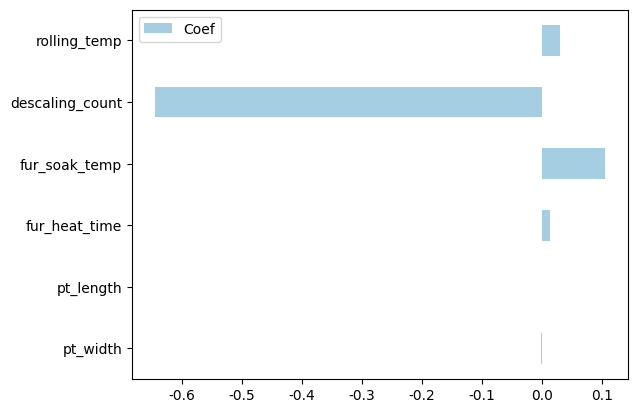

In [85]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

#### 목표변수인 후판의 Scale 불량을 설명하는 변수 중:
- fur_soak_temp(가열로 균열대 소재온도) > rolling_temp(압연 온도) > fur_heat_time (가열로 가열대 재로시간) 순으로 영향력이 크다

## 모델 예측 및 평가

In [66]:
# test 데이터 병합
df_logit_test = pd.concat([df_test_y,df_test_x_lo],axis=1)
df_logit_test

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,day_yn,purpose
642,0,영국,C,13,2900,52500,3,2,1157,158,1147,79,316,CR(제어압연),924,10,야간,선체구조용(조선용)
460,0,일본,C,18,3100,41800,2,1,1183,79,1162,44,202,CR(제어압연),936,10,주간,용접구조용
533,0,한국,T,61,2300,12200,2,2,1166,94,1121,79,263,CR(제어압연),891,6,야간,OTHERS
483,0,독일,T,36,2500,22000,3,2,1189,106,1165,82,277,TMCP(온도제어),882,8,야간,선체구조용(조선용)
464,1,영국,C,18,3100,48300,3,2,1193,63,1176,64,196,CR(제어압연),973,9,주간,선체구조용(조선용)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0,영국,C,15,3300,51500,1,2,1122,64,1123,85,211,CR(제어압연),861,10,주간,선체구조용(조선용)
631,0,영국,C,13,3200,43300,1,1,1157,133,1140,90,301,CR(제어압연),929,10,야간,선체구조용(조선용)
375,0,프랑스,C,20,3600,37700,3,2,1178,75,1167,57,206,CR(제어압연),977,8,야간,선체구조용(조선용)
575,0,영국,T,40,2300,20200,1,1,1123,78,1118,112,245,TMCP(온도제어),818,6,주간,선체구조용(조선용)


In [67]:
# train 데이터 예측
y_pred_train = log_result.predict(df_logit)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)  # 0.5 : “1/0” 판정 임계값(1 발생 확률) 변경 가능

# test 데이터 예측
y_pred_test = log_result.predict(df_logit_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)

## 평가

In [68]:
# 실제 train 데이터와 예측 결과 비교
print("Train 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_logit["scale"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_logit["scale"],y_pred_train_class)),"\n")
print(classification_report(df_logit["scale"], y_pred_train_class, digits=3))

# 실제 train 데이터와 예측 결과 비교
print("Test 예측/분류 결과")
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_logit_test["scale"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_logit_test["scale"],y_pred_test_class)),"\n")
print(classification_report(df_logit_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy: 0.863

Confusion Matrix: 
[[445  37]
 [ 54 126]] 

              precision    recall  f1-score   support

           0      0.892     0.923     0.907       482
           1      0.773     0.700     0.735       180

    accuracy                          0.863       662
   macro avg      0.832     0.812     0.821       662
weighted avg      0.859     0.863     0.860       662

Test 예측/분류 결과
Accuracy: 0.856

Confusion Matrix: 
[[188  14]
 [ 27  56]] 

              precision    recall  f1-score   support

           0      0.874     0.931     0.902       202
           1      0.800     0.675     0.732        83

    accuracy                          0.856       285
   macro avg      0.837     0.803     0.817       285
weighted avg      0.853     0.856     0.852       285



## 표준화 회귀 계수

In [69]:
df_scaled_reg = pd.concat([df_train_x_reg,df_train_y],axis=1)
df_scaled_reg

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_temp,descaling_count,spec_country,fur_no,fur_input_row,purpose,steel_kind,day_yn,rolling_method,scale
565,3.048596,0.141116,-1.943388,-0.860304,1.737786,-1.554930,0.402834,1.271531,-0.990555,-1.594390,한국,2,2,OTHERS,T,주간,CR(제어압연),0
771,-0.037866,-0.468171,-0.393299,0.368730,-0.499588,0.527104,-0.421839,-0.411992,1.328976,-0.342411,미국,2,1,OTHERS,C,야간,CR(제어압연),1
46,1.365071,0.547307,-1.755935,-1.143928,-1.106333,-1.497096,1.518568,-0.017416,-1.224065,-1.594390,미국,3,1,선체구조용(조선용),T,주간,TMCP(온도제어),0
703,-0.430688,-0.265075,1.264936,0.983248,-0.651274,0.816276,-0.712900,-0.306772,1.002062,0.909569,영국,3,1,선체구조용(조선용),C,주간,CR(제어압연),1
457,-0.711276,0.141116,1.264936,0.416001,-0.537509,0.700607,-0.567369,-0.464602,-0.274458,0.909569,한국,3,1,용접구조용,C,주간,CR(제어압연),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.711276,-0.061980,1.272146,0.510542,-0.537509,0.584939,-0.567369,-1.358973,0.005753,0.909569,영국,3,2,선체구조용(조선용),C,야간,CR(제어압연),0
463,-0.486806,0.547307,0.688159,1.739577,-0.499588,1.105447,-0.518859,-0.675042,0.644014,0.283579,영국,3,1,선체구조용(조선용),C,주간,CR(제어압연),1
883,-0.374571,0.141116,0.911660,0.935977,-0.537509,0.874110,-0.567369,-0.043721,0.893091,0.909569,영국,3,2,선체구조용(조선용),C,주간,CR(제어압연),0
18,0.411074,-1.280553,-0.450976,-1.805716,1.510256,-1.844101,0.014753,0.640210,-0.149920,-0.342411,공통,2,1,OTHERS,T,주간,CR(제어압연),0


In [70]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + descaling_count +
       fur_total_time + rolling_temp + C(spec_country) + C(steel_kind) + C(rolling_method) + C(purpose) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

         Current function value: 0.281404
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      636
Method:                           MLE   Df Model:                           25
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5191
Time:                        01:42:02   Log-Likelihood:                -186.29
converged:                      False   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.127e-69
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          13.9802    851.327      0.016      0.987   -1654.590    1682.551
C(

#### P-value 기준 유의하지 않은 변수 내림차순 제거

In [71]:
#C(spec_country) 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + fur_soak_time + descaling_count +
       fur_total_time + rolling_temp  + C(steel_kind) + C(rolling_method) + C(purpose) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.286299
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      642
Method:                           MLE   Df Model:                           19
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5107
Time:                        01:42:03   Log-Likelihood:                -189.53
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.486e-72
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.8704      1.397     -0.623  

In [72]:
#fur_soak_time 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp  + C(steel_kind) + C(rolling_method) + C(purpose) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.286427
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      643
Method:                           MLE   Df Model:                           18
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5105
Time:                        01:42:03   Log-Likelihood:                -189.61
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 7.938e-73
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.9132      1.388     -0.658  

In [73]:
#C(purpose)제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_no) + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp  + C(steel_kind) + C(rolling_method) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.289508
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      646
Method:                           MLE   Df Model:                           15
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5052
Time:                        01:42:03   Log-Likelihood:                -191.65
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 4.385e-74
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.9972      0.426     -4.689  

In [74]:
#C(fur_no)제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp  + C(steel_kind) + C(rolling_method) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.291570
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                           13
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5017
Time:                        01:42:03   Log-Likelihood:                -193.02
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 5.460e-75
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.0015      0.406     -4.926  

In [75]:
#C(steel_kind) 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + C(fur_input_row) +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.292020
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      649
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.5009
Time:                        01:42:03   Log-Likelihood:                -193.32
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.253e-75
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.2011      0.311     -7.079  

In [76]:
#C(fur_input_row) 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.292823
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      650
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4996
Time:                        01:42:03   Log-Likelihood:                -193.85
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.458e-76
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.3157      0.292     -7.923  

In [77]:
#pt_thick 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method) + C(day_yn)""", df_scaled_reg)

# 적합
scaled_log_result =scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.293538
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      651
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4983
Time:                        01:42:03   Log-Likelihood:                -194.32
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 8.594e-77
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.2872      0.287     -7.980  

In [78]:
#C(day_yn) 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp + C(rolling_method)""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.295175
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      652
Method:                           MLE   Df Model:                            9
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4956
Time:                        01:42:04   Log-Likelihood:                -195.41
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 3.689e-77
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.4376      0.264     -9.220  

In [79]:
#C(rolling_method) 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
       fur_total_time + rolling_temp""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.296678
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      653
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4930
Time:                        01:42:04   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 1.372e-77
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2387      0.203    -11.027      0.000      -2.637      -1.841
pt_width      

In [80]:
#fur_total_time제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_width + pt_length +
       fur_heat_temp + fur_heat_time + fur_soak_temp + descaling_count +
        rolling_temp""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.298257
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                            7
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4903
Time:                        01:42:04   Log-Likelihood:                -197.45
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 5.014e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1955      0.198    -11.094      0.000      -2.583      -1.808
pt_width      

In [81]:
#fur_heat_temp 제거
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""scale ~ pt_width + pt_length +
        fur_heat_time + fur_soak_temp + descaling_count +
        rolling_temp""", df_scaled_reg)

# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.300340
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4867
Time:                        01:42:04   Log-Likelihood:                -198.82
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 2.359e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1796      0.198    -11.001      0.000      -2.568      -1.791
pt_width      

## 최종 모델

In [82]:
# 회귀계수가 유의한 변수만 사용한 모델
scaled_log_model = Logit.from_formula(""" scale ~ pt_width + pt_length +
        fur_heat_time + fur_soak_temp  + descaling_count +
       rolling_temp """, df_scaled_reg)
# 적합
scaled_log_result = scaled_log_model.fit()

# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.300340
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  662
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.4867
Time:                        01:42:04   Log-Likelihood:                -198.82
converged:                       True   LL-Null:                       -387.36
Covariance Type:            nonrobust   LLR p-value:                 2.359e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.1796      0.198    -11.001      0.000      -2.568      -1.791
pt_width      

#### 설명변수 중요도 (표준화 회귀계수)

<Axes: >

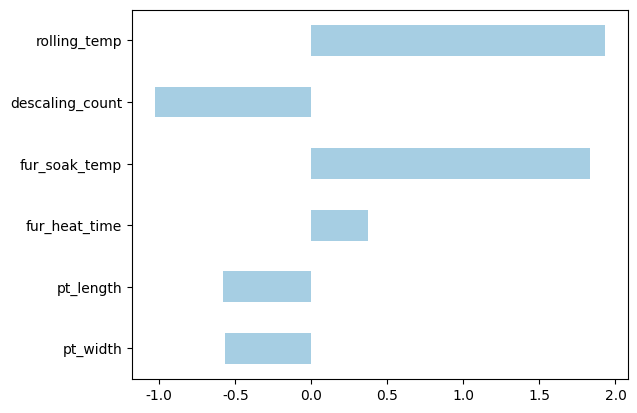

In [86]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

#### 목표변수인 후판의 Scale 불량을 설명하는 변수 중:
- rolling_temp(압연 온도) > fur_soak_temp(가열로 균열대 소재온도) > fur_heat_time (가열로 가열대 재로시간) 순으로 영향력이 크다